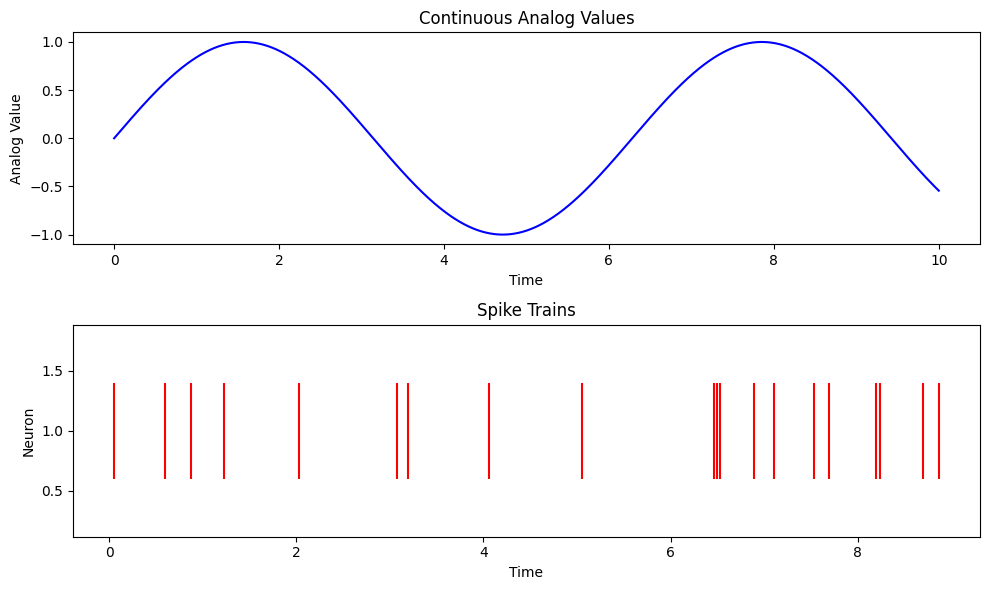

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate continuous analog values
t = np.linspace(0, 10, 1000)  # Time axis
analog_values = np.sin(t)  # Example continuous analog values (sine wave)

# Generate spike trains
spike_train_times = np.random.choice(t, size=20, replace=False)  # Example spike times

# Plot continuous analog values
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, analog_values, 'b-')
plt.title('Continuous Analog Values')
plt.xlabel('Time')
plt.ylabel('Analog Value')

# Plot spike trains
plt.subplot(2, 1, 2)
plt.eventplot(spike_train_times, color='r', linelengths=0.8)
plt.title('Spike Trains')
plt.xlabel('Time')
plt.ylabel('Neuron')

plt.tight_layout()
plt.show()


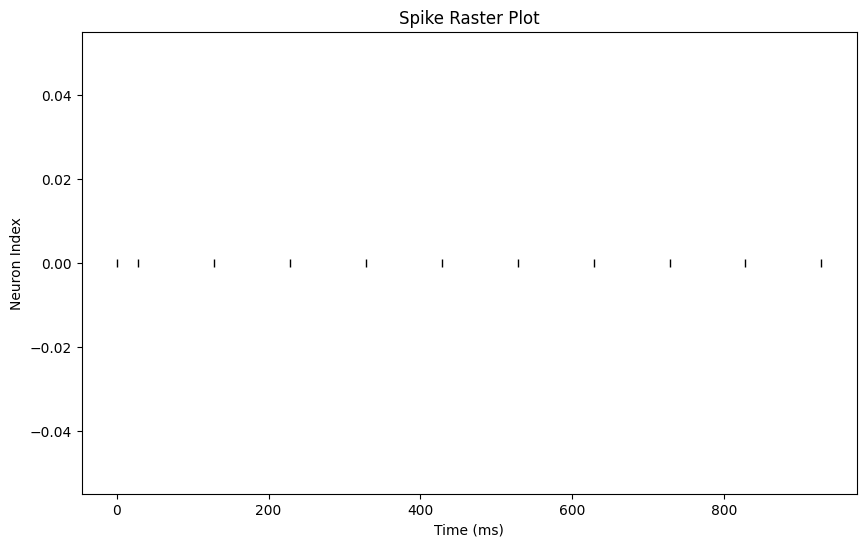

In [1]:
from brian2 import *

# Set up parameters
duration = 1000 * ms  # Simulation duration
num_neurons = 1  # Number of neurons
freq = 10 * Hz  # Frequency of the sinusoidal input

# Define the model equations
eqs = '''
dv/dt = (sin(2 * pi * freq * t) - v) / (10 * ms) : 1 (unless refractory)
'''

# Create a NeuronGroup
neurons = NeuronGroup(num_neurons, eqs, threshold='v > 0.8', reset='v = 0', refractory=5 * ms, method='euler')

# Set initial condition
neurons.v = 'rand()'

# Define the spike monitor
spike_mon = SpikeMonitor(neurons)

# Run the simulation
run(duration)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(spike_mon.t/ms, spike_mon.i, '|k')
plt.title('Spike Raster Plot')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.show()
